# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [2]:
import pandas as pd
data = pd.read_csv('data.csv')

In [3]:
data.shape

(569, 33)

In [16]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [4]:
unique_counts = data.nunique()
print("Number of unique values in each column:")
print(unique_counts)
most_diverse_column = unique_counts.idxmax()
print("\nColumn with the most unique values:", most_diverse_column)

Number of unique values in each column:
id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500

### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [5]:
redundant_columns = data.columns[data.nunique() == 1]
if len(redundant_columns) > 0:
    print("Columns where the value for every row is the same:")
    print(redundant_columns)
else:
    print("No columns with the same value for every row.")

No columns with the same value for every row.


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

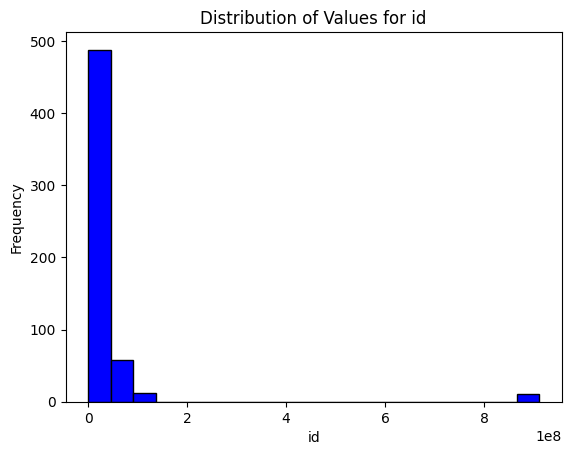

In [11]:
# Specify the numeric column for which you want to create a histogram
numeric_column = 'numeric_column'
numeric_columns = data.select_dtypes(include=['number']).columns
if not numeric_columns.empty:
    numeric_column = numeric_columns[0]
    # Plot the histogram
    plt.hist(data[numeric_column], bins=20, color='blue', edgecolor='black')
    plt.title(f'Distribution of Values for {numeric_column}')
    plt.xlabel(numeric_column)
    plt.ylabel('Frequency')
    plt.show()
else:
    print("No numeric columns found in the dataset.")

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

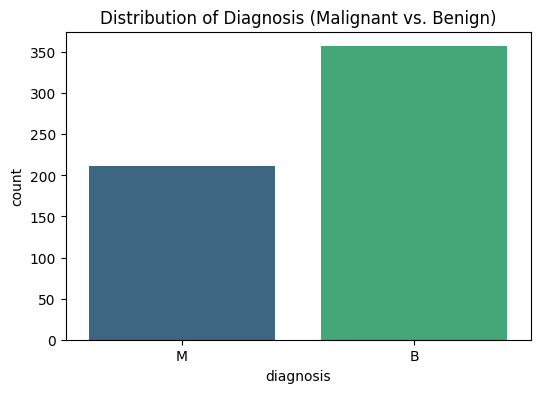

In [18]:
# Distribution of the target variable 'diagnosis'
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=data, palette='viridis')
plt.title('Distribution of Diagnosis (Malignant vs. Benign)')
plt.show()

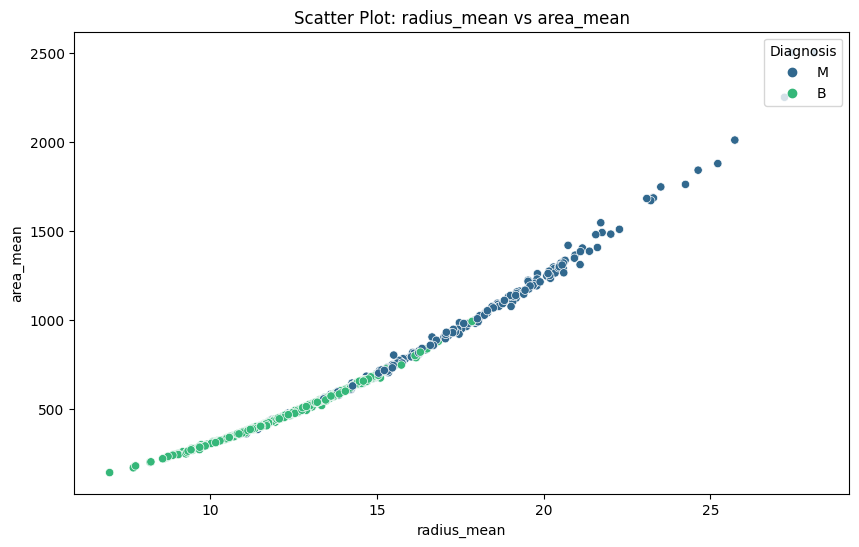

In [28]:
mean_radius = 'radius_mean'
mean_area = 'area_mean'
# Scatter plot for mean radius vs mean area
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mean_radius, y=mean_area, data=data, hue='diagnosis', palette='viridis')
plt.title(f'Scatter Plot: {mean_radius} vs {mean_area}')
plt.xlabel(mean_radius)
plt.ylabel(mean_area)
plt.legend(title='Diagnosis', loc='upper right')
plt.show()

<Figure size 1000x600 with 0 Axes>

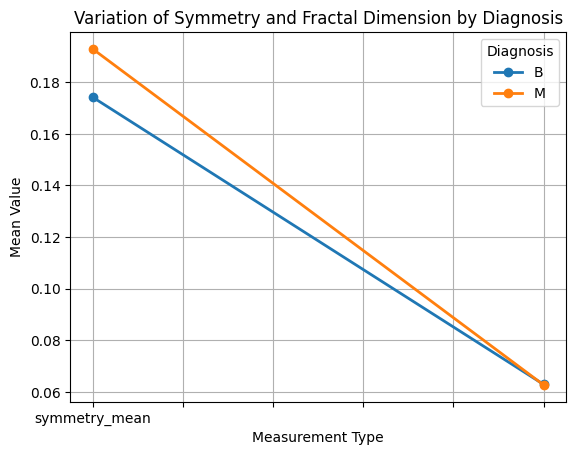

In [29]:
symmetry_column = 'symmetry_mean'
fractal_dimension_column = 'fractal_dimension_mean'
diagnosis_column = 'diagnosis'
grouped_data = data.groupby(diagnosis_column)[[symmetry_column, fractal_dimension_column]].mean()
plt.figure(figsize=(10, 6))
grouped_data.T.plot(marker='o', linestyle='-', linewidth=2)
plt.title('Variation of Symmetry and Fractal Dimension by Diagnosis')
plt.xlabel('Measurement Type')
plt.ylabel('Mean Value')
plt.legend(title='Diagnosis')
plt.grid(True)
plt.show()



---



## Submitting Your Work

Submit your work as usual.